In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Data/StageB.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
col_names = {
    'X1': 'Relative_Compactness',
    'X2': 'Surface_Area',
    'X3': 'Wall_Area',
    'X4': 'Roof_Area',
    'X5': 'Overall_Height',
    'X6': 'Orientation',
    'X7': 'Glazing_Area',
    'X8': 'Glazing_Area_Distribution',
    'Y1': 'Heating_Load',
    'Y2': 'Cooling_Load',
}

data.rename(columns=col_names,inplace=True)

In [4]:
len(data)

768

In [5]:
data.isna().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [6]:
heating_data = data.drop('Cooling_Load',axis=1)
cooling_data = data.drop('Heating_Load',axis=1)

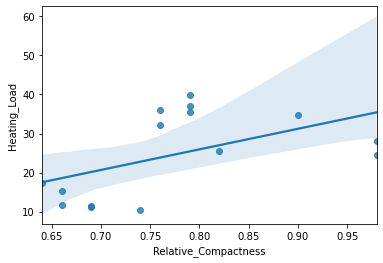

In [7]:
sns.regplot('Relative_Compactness','Heating_Load',data=data.sample(15));

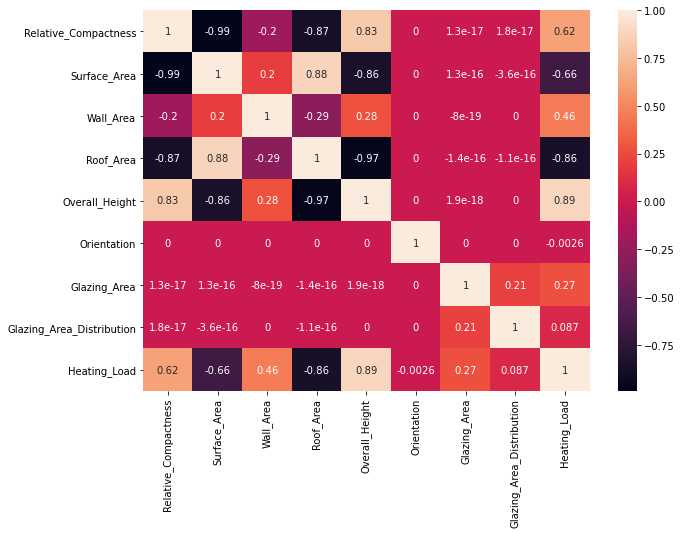

In [8]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(heating_data.corr(),annot=True,ax=ax);

## Heating Load

In [33]:
LR = LinearRegression()
Rr = Ridge()
LaR = Lasso()
Sscaler = StandardScaler()
MMscaler = MinMaxScaler()
EnR = ElasticNet()

In [21]:
X = heating_data.drop('Heating_Load',axis=1)
y = heating_data['Heating_Load']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train = Sscaler.fit_transform(X_train)
X_test = Sscaler.transform(X_test)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [22]:
LR.fit(X_train,y_train)

LinearRegression()

In [23]:
prediction = LR.predict(X_test)

In [24]:
LR_score = LR.score(X_test,y_test)

In [25]:
LR_score

0.9121846294352438

In [34]:
Rr.fit(X=X_train,y=y_train)
Rr.score(X_test,y_test)

0.9116028949393401

In [35]:
LaR.fit(X=X_train,y=y_train)
LaR.score(X_test,y_test)

0.8808022499700052

In [36]:
EnR.fit(X=X_train,y=y_train)
EnR.score(X_test,y_test)

0.8261298500000445